In [2]:
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape, Conv2DTranspose, Conv2D, LeakyReLU
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define hyperparameters
img_rows, img_cols = 28, 28
latent_dim = 100

In [4]:
# Load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

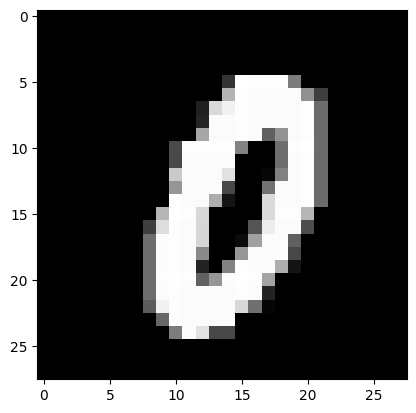

In [5]:
plt.imshow(x_train[34], cmap ='gray')

In [6]:
# Reshape and normalize data
x_train = x_train.reshape(-1, img_rows, img_cols, 1)
x_train = x_train.astype('float32') / 255.0

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
# Define the Discriminator model
def build_discriminator():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(img_rows, img_cols, 1)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(64, kernel_size=3, strides=2))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [10]:
discriminator = build_discriminator()

In [11]:
# Define the Generator model
def build_generator():
  model = Sequential()
  model.add(Dense(7 * 7 * 64, activation='relu', input_dim=latent_dim))
  model.add(Reshape((7, 7, 64)))
  model.add(Conv2DTranspose(32, kernel_size=3, strides=2, padding='same', activation='relu'))
  model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='tanh'))
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

In [12]:
generator = build_generator()

In [13]:
# Define the combined GAN model (for training the discriminator)
discriminator.trainable = False
gan_model = Sequential()
gan_model.add(generator)
gan_model.add(discriminator)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

In [14]:
batch_size= 32

In [15]:
for epoch in range(1000):
  # Train Discriminator on real and generated images
  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
  real_images = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
  generated_images = generator.predict(noise)

  real_labels = np.ones((batch_size, 1))
  fake_labels = np.zeros((batch_size, 1))

  discriminator_loss_real = discriminator.train_on_batch(real_images, real_labels)
  discriminator_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
  discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

  # Train Generator on fooling the discriminator
  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
  gen_labels = np.ones((batch_size, 1))
  gan_loss = gan_model.train_on_batch(noise, gen_labels)

  # Print progress
  print(f"Epoch: {epoch+1}, d_loss: {discriminator_loss}, g_loss: {gan_loss}")

1/1 [==============================] - 0s 161ms/step


2024-03-28 17:32:16.977925: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/sequential/leaky_re_lu_1/LeakyRelu/LeakyReluGrad' exist for missing node 'sequential/conv2d_1/BiasAdd'.


Epoch: 1, d_loss: [0.69875771 0.25      ], g_loss: 0.6888245940208435
1/1 [==============================] - 0s 22ms/step
Epoch: 2, d_loss: [0.67066881 0.5       ], g_loss: 0.684872031211853
1/1 [==============================] - 0s 21ms/step
Epoch: 3, d_loss: [0.63442492 0.5       ], g_loss: 0.676498293876648
1/1 [==============================] - 0s 55ms/step
Epoch: 4, d_loss: [0.61925679 0.5       ], g_loss: 0.664313793182373
1/1 [==============================] - 0s 26ms/step
Epoch: 5, d_loss: [0.61040452 0.5       ], g_loss: 0.6440592408180237
1/1 [==============================] - 0s 23ms/step
Epoch: 6, d_loss: [0.58719039 0.5       ], g_loss: 0.6189365983009338
1/1 [==============================] - 0s 27ms/step
Epoch: 7, d_loss: [0.56112909 0.5       ], g_loss: 0.5945888757705688
1/1 [==============================] - 0s 31ms/step
Epoch: 8, d_loss: [0.58227813 0.5       ], g_loss: 0.568116307258606
1/1 [==============================] - 0s 23ms/step
Epoch: 9, d_loss: [0.5729107

1/1 [==============================] - 0s 118ms/step


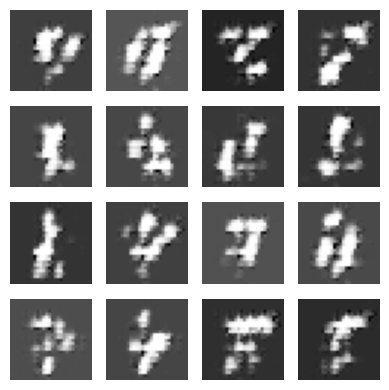

In [16]:
# Generate and plot images
noise = np.random.normal(0, 1, size=(16, latent_dim))
generated_images = generator.predict(noise)

plt.figure(figsize=(4, 4))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(generated_images[i, :, :, 0], cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()
